In [1]:
from fieldmaptrack.common_analysis import multipoles_analysis
from fieldmaptrack import Multipoles
import numpy as np
import matplotlib.pyplot as plt
import utils
import imaids.utils

from idanalysis import IDKickMap
from mathphys.functions import save_pickle, load_pickle

In [2]:
def create_model(phase, gap, solve=True):
    model = utils.generate_radia_model(
                        phase=phase,
                        gap=gap,
                        solve=solve)
    return model

In [3]:
def create_idkickmap(phase, gap):
    """."""
    # create  IDKickMap and set beam energy, fieldmap filename and RK step
    idkickmap = IDKickMap()
    print('creating model...')
    idkickmap.radia_model = create_model(phase, gap)
    idkickmap.beam_energy = 3.0
    idkickmap.traj_init_rz = -1*(utils.ID_PERIOD*utils.NR_PERIODS + 40)
    idkickmap.traj_rk_min_rz = utils.ID_PERIOD*utils.NR_PERIODS + 40
    idkickmap.kmap_idlen = 1.2
    # # print(idkickmap.brho)

    # set various fmap_configurations

    return idkickmap

In [4]:
def calc_rk_traj(data, phase, gap, traj_init_rx, traj_init_ry, rk_s_step, idkickmap=None):
    """."""
    # create IDKickMap
    if idkickmap is None:
        idkickmap = create_idkickmap(phase, gap)
    idkickmap.rk_s_step = rk_s_step
    print('Calculating trajectory...')
    traj_init_rz = idkickmap.traj_init_rz
    traj_rk_min_rz = idkickmap.traj_rk_min_rz
    idkickmap.fmap_calc_trajectory(
            traj_init_rx=traj_init_rx, traj_init_ry=traj_init_ry,
            traj_init_rz=traj_init_rz,
            traj_rk_min_rz=traj_rk_min_rz)
    traj = idkickmap.traj
    fname = 'traj_tests_p{}_g{}'.format(
        phase, gap)

    data[(traj_init_rx*1e3, traj_init_ry*1e3)] = traj
    save_pickle(data, fname, overwrite=True)
    return data

In [7]:
data = dict()

In [5]:
rk_s_step = 1
phase = -13.125
gap = 26.250
ry0 = -0.5e-3
posx = np.linspace(-2.2e-3, -1.9e-3, 9)
# idkickmap = create_idkickmap(phase, gap)
# for rx0 in posx:
    # data = calc_rk_traj(data, phase, gap, rx0, ry0, rk_s_step, idkickmap)

In [14]:
data = load_pickle('traj_tests_p-13.125_g26.25_v2')
px = list()
for keys, traj_ in data.items():
    px.append(1e6*traj_.px[-1])


Text(0.5, 0, 'Initial horizontal position [mm]')

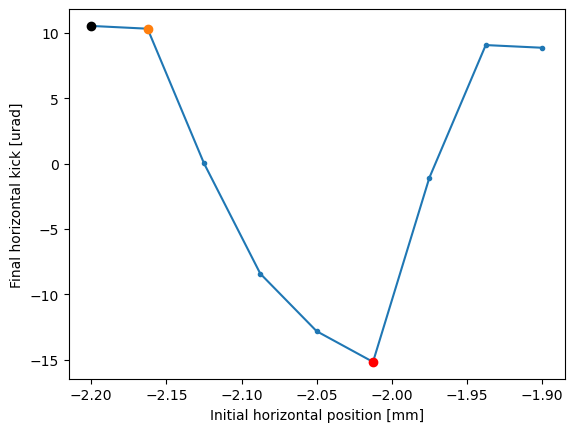

In [15]:
plt.plot(1e3*posx, px, '.-')
plt.plot(1e3*posx[0], px[0], 'o', color='k')
plt.plot(1e3*posx[1], px[1], 'o', color='C1')
plt.plot(1e3*posx[5], px[5], 'o', color='r')
plt.ylabel('Final horizontal kick [urad]')
plt.xlabel('Initial horizontal position [mm]')
# plt.savefig('kickmap')

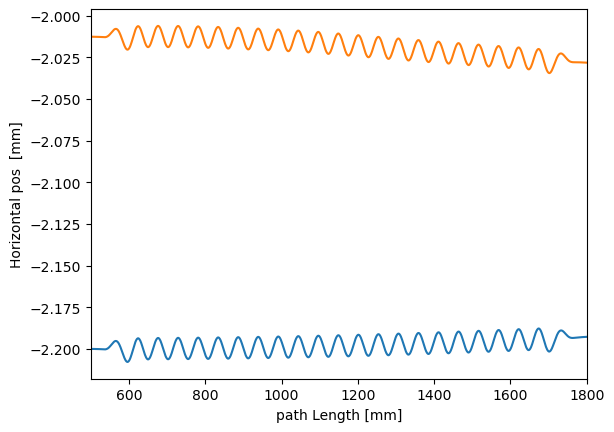

In [16]:
rx0 = -2.2
idc = 1
pto1 = list(data.keys())[idc][0]
pto2 = list(data.keys())[5][0]
traj0 = data[(rx0, -0.5)]
traj1 = data[(pto1, -0.5)]
traj2 = data[(pto2, -0.5)]
by0 = np.array(traj0.by)
by1 = np.array(traj1.by)
plt.plot(traj0.s, (traj0.rx), '-')
plt.plot(traj0.s, (traj2.rx), '-')
plt.ylabel('Horizontal pos  [mm]')
plt.xlabel('path Length [mm]')
plt.xlim(500, 1800)
plt.savefig('traj-rx')

In [17]:
for keys, traj_ in data.items():
    print(keys)

(-2.2, -0.5)
(-2.1625, -0.5)
(-2.125, -0.5)
(-2.0875, -0.5)
(-2.0500000000000003, -0.5)
(-2.0125, -0.5)
(-1.975, -0.5)
(-1.9375, -0.5)
(-1.9, -0.5)


x0 @ max diff: -2.1987
x1 @ max diff: -2.0149

y0 @ max diff: -0.5033
y1 @ max diff: -0.5032

z0 @ max diff: -111.5001
z1 @ max diff: -111.5001


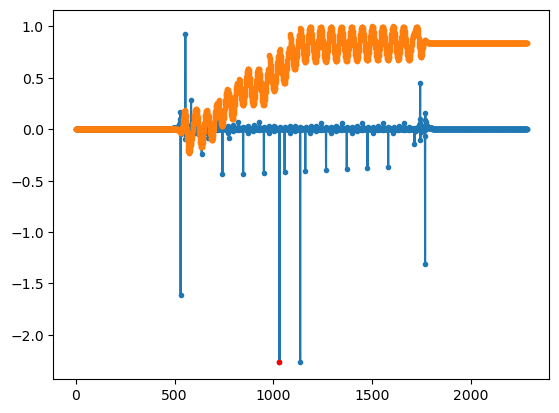

In [18]:
rx0 = -2.2
idc = 5
pto = list(data.keys())[idc][0]
traj0 = data[(rx0, -0.5)]
traj1 = data[(pto, -0.5)]
by0 = np.array(traj0.by)
by1 = np.array(traj1.by)
plt.plot(traj0.s, (by0-by1)/by0, '.-')
plt.plot(traj0.s, (traj0.px-traj1.px)/np.max((traj0.px-traj1.px)), '.-')


idcs = np.argsort((by0-by1))[::-1]
idx = idcs[0]

plt.plot(traj0.s[idx], ((by0-by1)/by0)[idx], '.', color='r')
print('x0 @ max diff: {:.4f}'.format(traj0.rx[idx]))
print('x1 @ max diff: {:.4f}'.format(traj1.rx[idx]))
print()
print('y0 @ max diff: {:.4f}'.format(traj0.ry[idx]))
print('y1 @ max diff: {:.4f}'.format(traj1.ry[idx]))
print()
print('z0 @ max diff: {:.4f}'.format(traj0.rz[idx]))
print('z1 @ max diff: {:.4f}'.format(traj1.rz[idx]))

# plt.xlim(700, 750)


by diff : 226.84 %


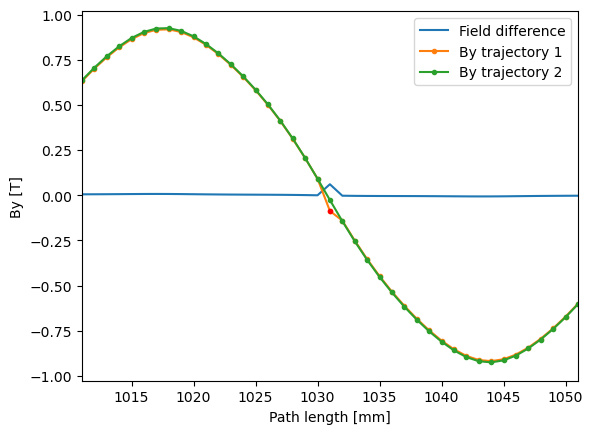

In [19]:
rx0 = -2.2
idc=5
pto = list(data.keys())[idc][0]
traj0 = data[(rx0, -0.5)]
traj1 = data[(pto, -0.5)]
by0 = np.array(traj0.by)
by1 = np.array(traj1.by)
plt.plot(traj1.s, by0-by1, label='Field difference')
plt.plot(traj1.s, by1, '.-', label='By trajectory 1')
plt.plot(traj1.s, by0, '.-', label='By trajectory 2')
plt.plot(traj1.s[idx], by1[idx], '.', color='r')
print('by diff : {:.2f} %'.format(100*(by1[idx] - by0[idx])/by0[idx]))
plt.xlim(traj1.s[idx-20], traj1.s[idx+20])
plt.ylabel('By [T]')
plt.xlabel('Path length [mm]')
plt.legend()
plt.savefig('field_dif')


In [320]:
np.min(np.abs(traj1.rz+111.5001))

2.8176558359405135e-05

In [37]:
phase = -13.125
gap = 26.250
imaids.utils.set_len_tol(5e-14, 5e-14)
model = create_model(phase, gap)

In [38]:
x0 = -2.1987
y0 = -0.5033
z0 = -111.5001
bx0, by0, bz0 = model.get_field_at_point([x0, y0, z0])

x1 = -2.0149
y1 = -0.5032
z1 = -111.5001
bx1, by1, bz1 = model.get_field_at_point([x1, y1, z1])


print('by0: {:.2f}'.format(by0))
print('by1: {:.2f}'.format(by1))
print('by diff : {:.2f} %'.format(100*(by1 - by0)/by0))

by0: -0.03
by1: -0.02
by diff : -6.63 %


In [39]:
x = np.linspace(-1.8, -2.4, 100)
y = np.linspace(-0.6, -0.4, 100)
z0 = -111.5001
x0 = -2.1987
b0 = np.ones((len(x), len(y), 3))
b1 = np.ones((len(x), len(y), 3))
b0[:, 0, :] = model.get_field(x=x0, y=-0.5033, z=z0)
for i, y0 in enumerate(y):
    b0[:, i, :] = b0[:, 0, :]
    b1[:, i, :] = model.get_field(x=x, y=y0, z=z0)

In [40]:
rx0 = -2.2
traj0 = data[(rx0, -0.5)]
traj = list()
for idc in range(9):
    pto = list(data.keys())[idc][0]
    traj_ = data[(pto, -0.5)]
    traj.append(traj_)

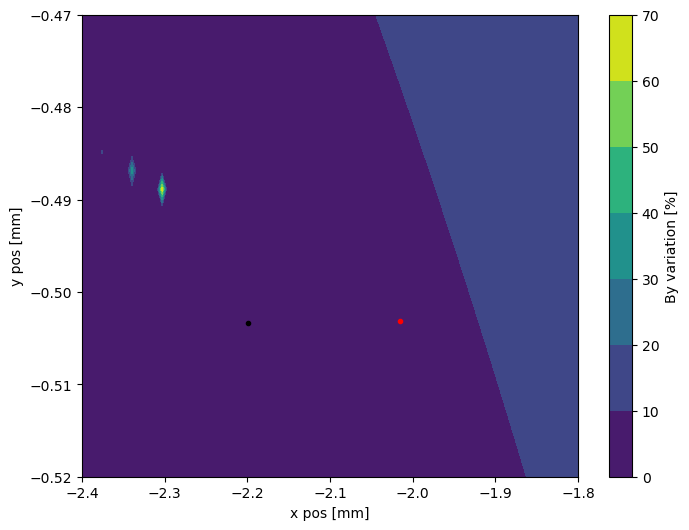

In [41]:
by0 = b0[:, :, 1]
by1 = b1[:, :, 1]
dif = ((by1-by0)/by0).T

fig = plt.figure(figsize =(8, 6))
ax = plt.axes()
contour = ax.contourf(x, y , np.abs(100*dif))
fig.colorbar(contour, ax=ax, shrink=1,  aspect=20, label='By variation [%]')
ax.set_xlabel('x pos [mm]')
ax.set_ylabel('y pos [mm]')

idx = np.argmin(np.abs(traj[idc].rz + 111.5))
y0 = traj[0].ry[idx]
idx = np.argmin(np.abs(traj[idc].rz + 111.5))
x0 = traj[0].rx[idx]
ax.plot(x0, y0, '.', color='k')

idc = 5
idx = np.argmin(np.abs(traj[idc].rz + 111.5))
y1 = traj[idc].ry[idx]
idx = np.argmin(np.abs(traj[idc].rz + 111.5))
x1 = traj[idc].rx[idx]

ax.plot(x1, y1, '.', color='r')
# ax.plot(traj0.rx[-1], traj0.ry[-1], '.', color='r')
# ax.plot(traj0.rx, traj0.ry, color='r', linestyle='dashed', linewidth=0.2)

# for i in np.arange(1, 9):
#     ax.plot(traj[i].rx[0], traj[i].ry[0], '.', color='k')
#     ax.plot(traj[i].rx[-1], traj[i].ry[-1], '.', color='k')
#     ax.plot(traj[i].rx, traj[i].ry, color='k', 
#             linestyle='dashed', linewidth=0.2)

ax.set_ylim(-0.520, -0.470)
plt.savefig('x_vs_y_by')

In [42]:
x = np.linspace(-2.200, -1.9, 100)
y0 = -0.5033
z0 = -111.5001
z = np.linspace(-111.503, -111.496, 100)
b0 = np.ones((len(x), len(y), 3))
b1 = np.ones((len(x), len(y), 3))
b0[0, :, :] = model.get_field(x=-2.1987, y=y0, z=z0)
for i, x0 in enumerate(x):
    b0[i, :, :] = b0[0, :, :]
    b1[i, :, :] = model.get_field(x=x0, y=y0, z=z)

In [43]:
rx0 = -2.2
traj0 = data[(rx0, -0.5)]
traj = list()
for idc in range(9):
    pto = list(data.keys())[idc][0]
    traj_ = data[(pto, -0.5)]
    traj.append(traj_)

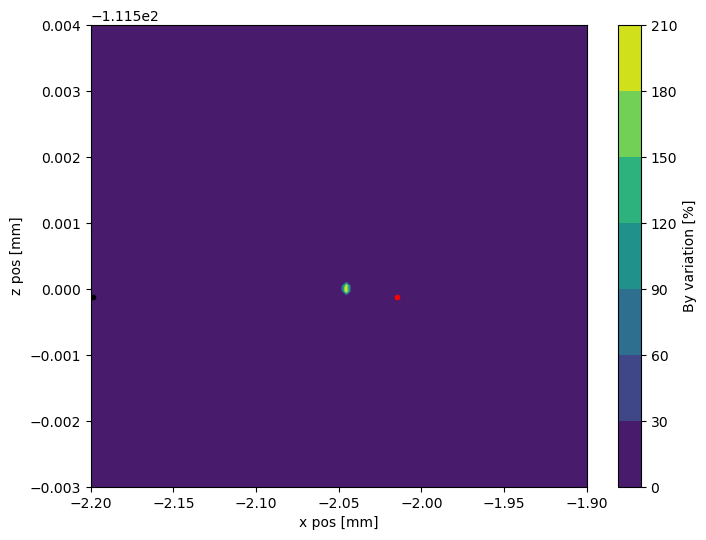

In [44]:
by0 = b0[:, :, 1]
by1 = b1[:, :, 1]
dif = ((by1-by0)/by0).T

fig = plt.figure(figsize =(8, 6))
ax = plt.axes()
contour = ax.contourf(x, z , np.abs(100*dif))
fig.colorbar(contour, ax=ax, shrink=1,  aspect=20, label='By variation [%]')
ax.set_xlabel('x pos [mm]')
ax.set_ylabel('z pos [mm]')

idx = np.argmin(np.abs(traj[0].rz + 111.5))
z0 = traj[0].rz[idx]
idx = np.argmin(np.abs(traj[0].rz + 111.5))
x0 = traj[0].rx[idx]

idc = 5
idx = np.argmin(np.abs(traj[idc].rz + 111.5))
z1 = traj[idc].rz[idx]
idx = np.argmin(np.abs(traj[idc].rz + 111.5))
x1 = traj[idc].rx[idx]

plt.plot(x0, z0, '.', color='k')
plt.plot(x1, z1, '.', color='r')
plt.savefig('x_vs_z_by')